In [128]:
import numpy as np

import matplotlib.pyplot as plt

import matplotlib.patches as mpatches

from sklearn.datasets import make_blobs

from sklearn.mixture import GaussianMixture

from sklearn.cluster import KMeans

from matplotlib.patches import Ellipse


In [129]:
# Step 1: Generate synthetic data

X, y_true = make_blobs(n_samples=500, centers = 3, cluster_std=[1.2, 2.0, 1.5],random_state=42)

In [130]:
# Step 2: Fit Gaussian Mixture Model (GMM)

gmm = GaussianMixture(n_components=2,covariance_type='full', random_state= 42)

gmm.fit(X)

gmm_labels = gmm.predict(X)

In [131]:
# Step 3: Fit K-Means for comparison

kmeans = KMeans(n_clusters=3,random_state=42,n_init=10)

kmeans_labels = kmeans.fit_predict(X)

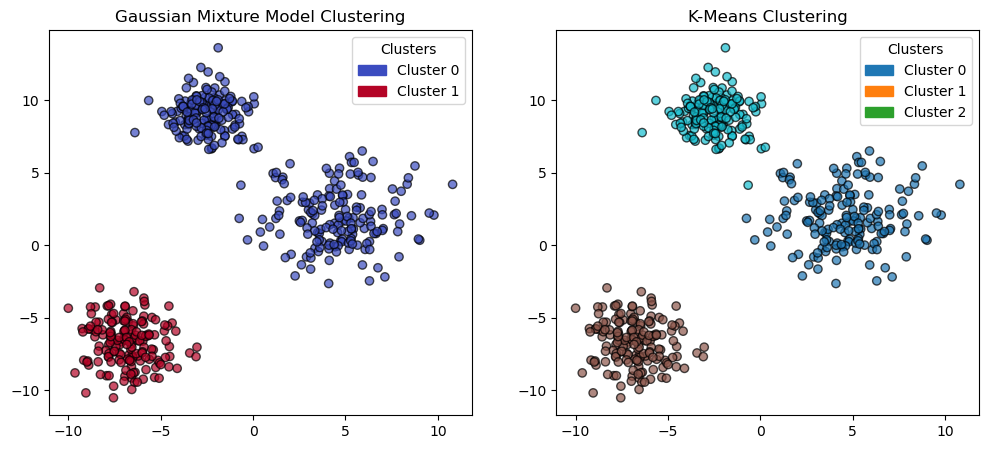

In [132]:

fig, ax = plt.subplots(1, 2, figsize=(12, 5))

# Get unique cluster labels

unique_gmm_labels = np.unique(gmm_labels)

unique_kmeans_labels = np.unique(kmeans_labels)

# Define colormap

gmm_cmap = plt.get_cmap('coolwarm')

kmeans_cmap = plt.get_cmap('tab10')

# Create scatter plots

scatter_gmm = ax[0].scatter(X[:, 0], X[:, 1], c=gmm_labels, cmap=gmm_cmap,edgecolors='k' ,alpha=0.7)

scatter_kmeans = ax[1].scatter(X[:, 0], X[:, 1], c=kmeans_labels, cmap=kmeans_cmap, edgecolors='k',alpha=0.7)

ax[0].set_title("Gaussian Mixture Model Clustering")

ax[1].set_title("K-Means Clustering")

# Create legend handles for GMM Clustering

gmm_legend_handles = [mpatches.Patch(color=gmm_cmap(i / max(unique_gmm_labels)), label=f'Cluster {i}') for i in unique_gmm_labels]

ax[0].legend(handles=gmm_legend_handles, title="Clusters")

# Create legend handles for K-Means Clustering

kmeans_legend_handles = [mpatches.Patch(color=kmeans_cmap(i / max(unique_kmeans_labels)), label=f'Cluster {i}') for i in unique_kmeans_labels]

ax[1].legend(handles=kmeans_legend_handles, title="Clusters")


plt.show()
